# Clasificador imágenes Cancer de piel

Ejecutar en Colab, las imagenes se encuentran en [kaggle](https://www.kaggle.com/fanconic/skin-cancer-malignant-vs-benign). 

In [ ]:
!pip install opencv-python

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#red neuronal tradicional
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#red neuronal convolucional
# aplicar las convouciones y filtros
from tensorflow.keras.layers import Convolution2D
#reducir la dimensionalidad de la imagen a la mitad
from tensorflow.keras.layers import MaxPooling2D
#convertir a un vector de características en 1D
from tensorflow.keras.layers import Flatten

#importar open cv que sirve para lectura de imagenes
import cv2
#importar libreria para operaciones vectoriales, arrays, matrices etc
import numpy as np

In [ ]:
#crear el modelo
modelo = Sequential()

#aplicar convoluciones de 32 filtros de 3*3 a la matriz de 224*224 de 3 canales, y aplicar
#la función relu para obtener el mapa de características
modelo.add(
    Convolution2D(32, (3, 3), input_shape=(224, 224, 3), activation='relu'))
#realizar el maxpooling, llevar la matriz o mapa de características a la mitad de la dimensión
modelo.add(MaxPooling2D(pool_size=((2, 2))))
#aplicar el flatten es convertir la matriz en un vector 1D
modelo.add(Flatten())

In [ ]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 220, 220, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 32)      0         
_________________________________________________________________
flatten (Flatten)            (None, 387200)            0         
Total params: 2,432
Trainable params: 2,432
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#implentar la red nueronal
#capa de entrada
modelo.add(Dense(128, activation='relu'))
#capa oculta
modelo.add(Dense(50, activation='relu'))
#capa de salida
modelo.add(Dense(1, activation='sigmoid'))

#método de optimización (busca el mímino optimo) y cálculo de la pérdida y
# la métrica para determinar que tan bueno e sel modelo
modelo.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics=['accuracy'])

In [ ]:
x_train = []
y_train = []
x_test = []
y_test = []

datatemp = []

#librerias para cargar la data entrenamiento
import glob
import os

for filenames in glob.glob(
        os.path.join('/content/drive/MyDrive/Colab_Notebooks/CNN/data/train/malignant',
                     '*.jpg')):
    datatemp.append([1, cv2.imread(filenames)])

for filenames in glob.glob(
        os.path.join('/content/drive/MyDrive/Colab_Notebooks/CNN/data/train/benign', '*.jpg')):
    datatemp.append([0, cv2.imread(filenames)])

In [ ]:
datatemp

[[1, array([[[160, 152, 193],
          [152, 148, 189],
          [154, 149, 194],
          ...,
          [175, 167, 207],
          [166, 163, 202],
          [157, 156, 198]],
  
         [[159, 153, 194],
          [149, 149, 189],
          [148, 146, 188],
          ...,
          [173, 164, 204],
          [162, 164, 199],
          [149, 150, 194]],
  
         [[161, 155, 196],
          [157, 155, 197],
          [156, 152, 193],
          ...,
          [173, 165, 202],
          [161, 161, 201],
          [148, 150, 198]],
  
         ...,
  
         [[119, 127, 180],
          [120, 127, 182],
          [115, 126, 184],
          ...,
          [133, 134, 192],
          [117, 125, 184],
          [123, 131, 190]],
  
         [[118, 127, 184],
          [124, 131, 188],
          [120, 126, 185],
          ...,
          [137, 138, 194],
          [124, 131, 188],
          [122, 134, 192]],
  
         [[123, 127, 185],
          [130, 137, 187],
          [125, 131, 

In [ ]:
#una vez cargada las imagenes se van a aleatorizar mediante la función shuffle
from random import shuffle

shuffle(datatemp)

for i, j in datatemp:
    x_train.append(j)
    y_train.append(i)

x_train = np.array(x_train)
y_train = np.array(y_train)

In [ ]:
#leer las imagenes de pruebas

for filenames in glob.glob(
        os.path.join('/content/drive/MyDrive/Colab_Notebooks/CNN/data/test/malignant',
                     '*.jpg')):
    x_test.append(cv2.imread(filenames))
    y_test.append(1)

for filenames in glob.glob(
        os.path.join('/content/drive/MyDrive/Colab_Notebooks/CNN/data/test/benign', '*.jpg')):
    x_test.append(cv2.imread(filenames))
    y_test.append(0)

x_test = np.array(x_test)
y_test = np.array(y_test)

In [ ]:
#entranamiento del modelo
modelo.fit(x_train,
           y_train,
           batch_size=32,
           epochs=4,
           validation_data=(x_test, y_test))

Epoch 1/4
83/83 [==============================] - 37s 77ms/step - loss: 89.5300 - accuracy: 0.6598 - val_loss: 0.5893 - val_accuracy: 0.6909
Epoch 2/4
83/83 [==============================] - 6s 70ms/step - loss: 0.5099 - accuracy: 0.7577 - val_loss: 0.6395 - val_accuracy: 0.6939
Epoch 3/4
83/83 [==============================] - 6s 69ms/step - loss: 0.3984 - accuracy: 0.8127 - val_loss: 0.7462 - val_accuracy: 0.6864
Epoch 4/4
83/83 [==============================] - 6s 69ms/step - loss: 0.3223 - accuracy: 0.8525 - val_loss: 1.0701 - val_accuracy: 0.6924


In [ ]:
#probar nuestro modelo
#cargar una imagen
#ruta = '/content/drive/MyDrive/Colab_Notebooks/CNN/data/test/malignant/176.jpg'
#I = cv2.imread(ruta)

In [ ]:
#probar nuestro modelo
#cargar una imagen

ruta=glob.glob(os.path.join('/content/drive/MyDrive/Colab_Notebooks/CNN/data/test/benign/','*.jpg'))[0]

print(ruta)
I=cv2.imread(ruta)

/content/drive/MyDrive/Colab_Notebooks/CNN/data/test/benign/1.jpg


In [ ]:
np.array([I])

array([[[[148, 140, 177],
         [156, 151, 190],
         [154, 152, 188],
         ...,
         [160, 156, 192],
         [159, 156, 188],
         [158, 153, 185]],

        [[160, 156, 198],
         [171, 168, 213],
         [171, 169, 211],
         ...,
         [178, 174, 215],
         [177, 173, 214],
         [171, 168, 213]],

        [[158, 152, 193],
         [168, 166, 208],
         [170, 166, 207],
         ...,
         [179, 175, 210],
         [175, 170, 209],
         [175, 166, 209]],

        ...,

        [[160, 157, 189],
         [171, 171, 207],
         [171, 173, 207],
         ...,
         [177, 177, 213],
         [176, 175, 214],
         [172, 171, 211]],

        [[160, 158, 188],
         [172, 169, 208],
         [171, 171, 207],
         ...,
         [175, 175, 215],
         [172, 171, 211],
         [171, 170, 210]],

        [[160, 155, 187],
         [171, 169, 205],
         [171, 172, 206],
         ...,
         [173, 175, 215],
        

In [ ]:
modelo.predict(np.array([I]))

array([[0.19212128]], dtype=float32)

In [ ]:
from google.colab.patches import cv2_imshow

es benigno


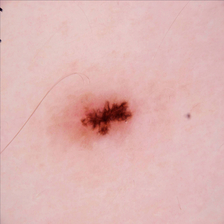

In [ ]:
if round(modelo.predict(np.array([I]))[0][0]) == 1:
    print("es maligno")
    cv2_imshow(I)
else:
    print("es benigno")
    cv2_imshow(I)

In [ ]:
# guardar el modelo
#Save the entire model as a SavedModel.
!mkdir -p saved_model
modelo.save('saved_model/my_model')

INFO:tensorflow:Assets written to: saved_model/my_model/assets


In [ ]:
os.getcwd(

'/content'

In [ ]:
import tensorflow as tf
new_model = tf.keras.models.load_model('saved_model/my_model')

# Check its architecture
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 220, 220, 32)      2432      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 110, 110, 32)      0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 387200)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               49561728  
_________________________________________________________________
dense_4 (Dense)              (None, 50)                6450      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 51        
Total params: 49,570,661
Trainable params: 49,570,661
Non-trainable params: 0
__________________________________________